# Levenshtein Distance

The Levenshtein distance, also known as edit distance, is a string metric for measuring the difference between two sequences. It quantifies how dissimilar two strings are by counting the minimum number of single-character operations (insertions, deletions, or substitutions) required to change one string into the other.


## Definition and Concept

The Levenshtein distance between two strings a and b is defined as the minimum number of elementary operations required to transform string a into string b, where an elementary operation is one of:

1. **Insertion**: Insert a single character into string a
2. **Deletion**: Delete a single character from string a
3. **Substitution**: Replace a character in string a with a different character

For example, the Levenshtein distance between "kitten" and "sitting" is 3, as the following three edits change one into the other:
1. kitten → sitten (substitution of "s" for "k")
2. sitten → sittin (substitution of "i" for "e")
3. sittin → sitting (insertion of "g" at the end)

### Mathematical Definition

Mathematically, the Levenshtein distance between two strings a and b is given by lev(a,b) where:

For empty strings:
- lev(ε, ε) = 0 (where ε is the empty string)
- lev(a, ε) = lev(ε, a) = |a| (the length of a)

For non-empty strings, it's defined recursively as:

$$lev(a,b) = \min \begin{cases}
lev(tail(a), b) + 1 \\
lev(a, tail(b)) + 1 \\
lev(tail(a), tail(b)) + cost
\end{cases}$$

Where:
- tail(s) is the string s without its first character
- cost = 0 if the first characters of a and b are the same, 1 otherwise


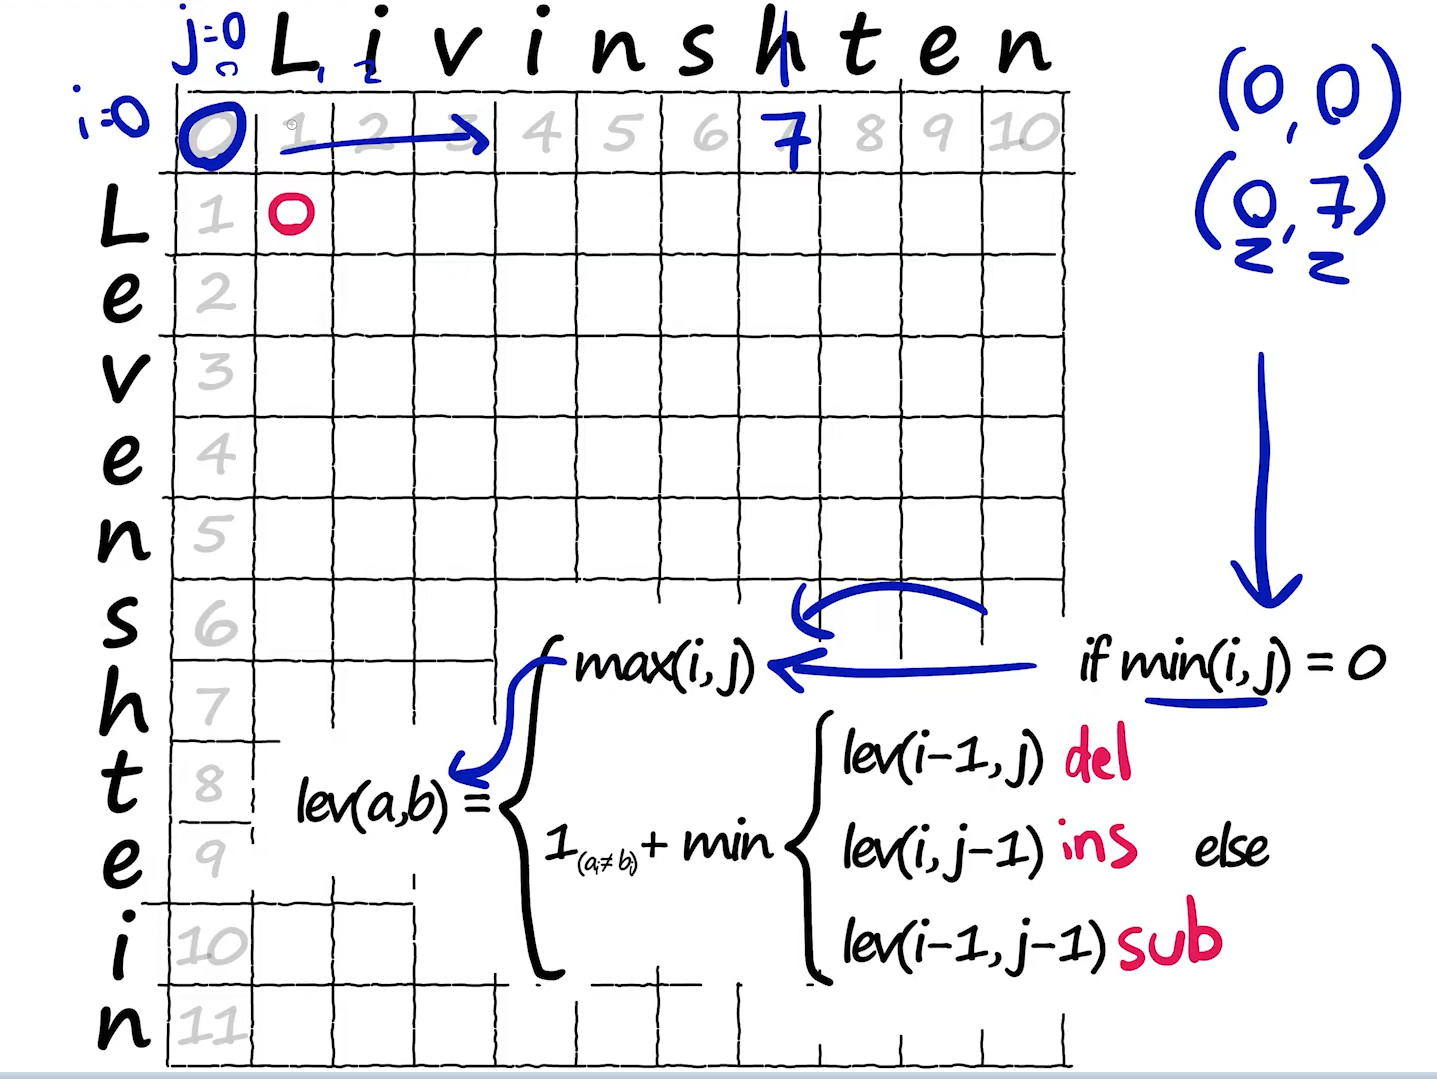

The last value is the levenshtein value:
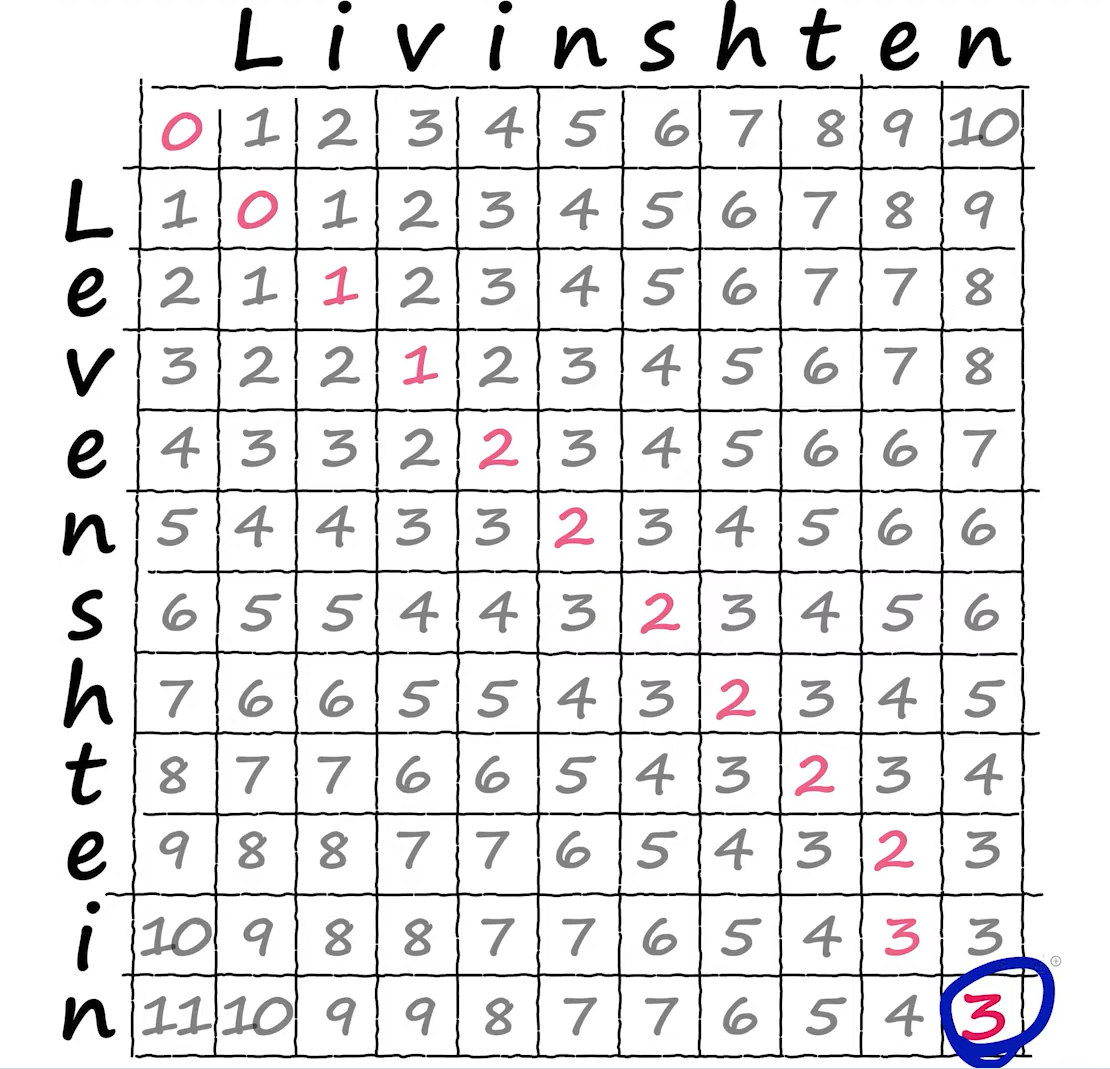

In [4]:
# Recursive implementation of Levenshtein distance
def levenshtein_distance_recursive(str1, str2):
    """
    Calculate the Levenshtein distance between two strings using recursion.

    Parameters:
    -----------
    str1, str2 : str
        The two strings to compare

    Returns:
    --------
    int
        The Levenshtein distance
    """
    # Base cases
    if len(str1) == 0:
        return len(str2)  # If str1 is empty, insert all characters of str2
    if len(str2) == 0:
        return len(str1)  # If str2 is empty, delete all characters of str1

    # If the first characters match, no operation needed for them
    if str1[0] == str2[0]:
        cost = 0
    else:
        cost = 1  # Substitution cost

    # Recursive calculation considering all three operations
    return min(
        levenshtein_distance_recursive(str1[1:], str2) + 1,      # Deletion
        levenshtein_distance_recursive(str1, str2[1:]) + 1,      # Insertion
        levenshtein_distance_recursive(str1[1:], str2[1:]) + cost  # Substitution
    )

# Example usage
str1 = "kitten"
str2 = "sitting"

print(f"Recursive Levenshtein distance between '{str1}' and '{str2}': {levenshtein_distance_recursive(str1, str2)}")

# Note: The recursive implementation is inefficient for longer strings
# due to repeated calculations. Let's implement a more efficient version using dynamic programming.


Recursive Levenshtein distance between 'kitten' and 'sitting': 3


## Dynamic Programming Implementation

The recursive implementation above has exponential time complexity, making it impractical for longer strings. A more efficient approach uses dynamic programming with a matrix to store intermediate results:


In [5]:
# Dynamic programming implementation of Levenshtein distance
def levenshtein_distance(str1, str2):
    """
    Calculate the Levenshtein distance between two strings using dynamic programming.

    Parameters:
    -----------
    str1, str2 : str
        The two strings to compare

    Returns:
    --------
    int
        The Levenshtein distance
    """
    # Create a matrix of size (len(str1)+1) x (len(str2)+1)
    m, n = len(str1), len(str2)
    dp = [[0 for _ in range(n + 1)] for _ in range(m + 1)]

    # Initialize the first row and column
    for i in range(m + 1):
        dp[i][0] = i  # Distance from any string to empty string is the length
    for j in range(n + 1):
        dp[0][j] = j  # Distance from empty string to any string is the length

    # Fill the matrix
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            # If characters match, no operation needed
            if str1[i-1] == str2[j-1]:
                dp[i][j] = dp[i-1][j-1]
            else:
                # Take the minimum of three operations
                dp[i][j] = 1 + min(
                    dp[i-1][j],      # Deletion
                    dp[i][j-1],      # Insertion
                    dp[i-1][j-1]     # Substitution
                )

    return dp[m][n]

# Example usage
examples = [
    ("kitten", "sitting"),
    ("sunday", "saturday"),
    ("python", "programming"),
    ("hello", "hello"),
    ("", "world")
]

for str1, str2 in examples:
    distance = levenshtein_distance(str1, str2)
    print(f"Levenshtein distance between '{str1}' and '{str2}': {distance}")


Levenshtein distance between 'kitten' and 'sitting': 3
Levenshtein distance between 'sunday' and 'saturday': 3
Levenshtein distance between 'python' and 'programming': 9
Levenshtein distance between 'hello' and 'hello': 0
Levenshtein distance between '' and 'world': 5


## Visualizing the Dynamic Programming Matrix

To better understand how the Levenshtein distance is calculated, let's visualize the dynamic programming matrix for a simple example:


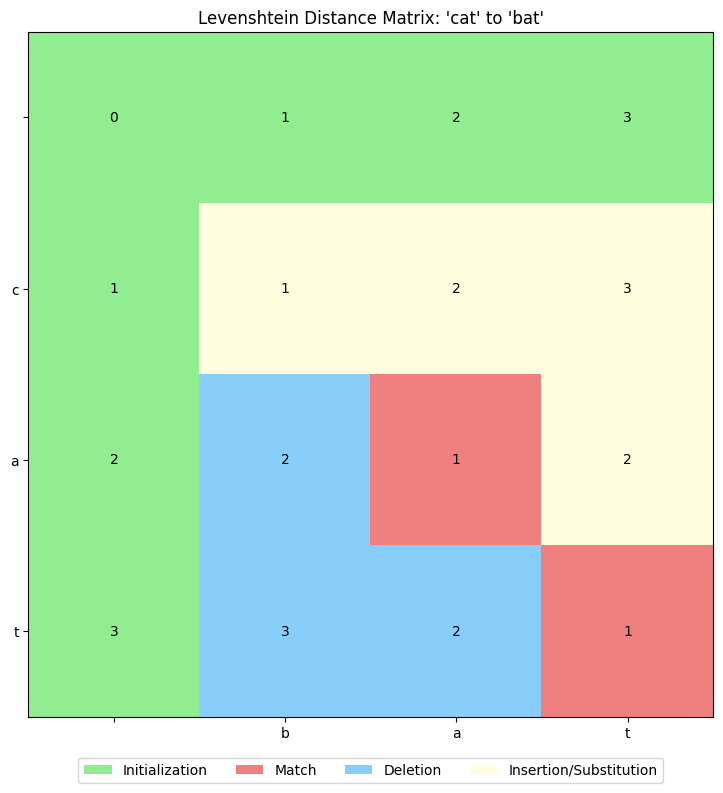

Levenshtein distance between 'cat' and 'bat': 1


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def visualize_levenshtein_matrix(str1, str2):
    """
    Visualize the Levenshtein distance calculation matrix.

    Parameters:
    -----------
    str1, str2 : str
        The two strings to compare
    """
    # Create the matrix
    m, n = len(str1), len(str2)
    dp = [[0 for _ in range(n + 1)] for _ in range(m + 1)]

    # Initialize the first row and column
    for i in range(m + 1):
        dp[i][0] = i
    for j in range(n + 1):
        dp[0][j] = j

    # Fill the matrix and track operations
    operations = [['' for _ in range(n + 1)] for _ in range(m + 1)]
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if str1[i-1] == str2[j-1]:
                dp[i][j] = dp[i-1][j-1]
                operations[i][j] = 'match'
            else:
                deletion = dp[i-1][j]
                insertion = dp[i][j-1]
                substitution = dp[i-1][j-1]

                min_op = min(deletion, insertion, substitution)
                dp[i][j] = 1 + min_op

                if min_op == deletion:
                    operations[i][j] = 'delete'
                elif min_op == insertion:
                    operations[i][j] = 'insert'
                else:
                    operations[i][j] = 'substitute'

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 8))

    # Create a color map for different operations
    cmap = mcolors.ListedColormap(['white', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightyellow'])
    bounds = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5]
    norm = mcolors.BoundaryNorm(bounds, cmap.N)

    # Map operations to colors
    color_matrix = np.zeros((m + 1, n + 1))
    for i in range(m + 1):
        for j in range(n + 1):
            if i == 0 or j == 0:
                color_matrix[i, j] = 1  # initialization
            elif operations[i][j] == 'match':
                color_matrix[i, j] = 2  # match
            elif operations[i][j] == 'delete':
                color_matrix[i, j] = 3  # deletion
            elif operations[i][j] == 'insert':
                color_matrix[i, j] = 4  # insertion
            else:
                color_matrix[i, j] = 5  # substitution

    # Plot the matrix
    im = ax.imshow(color_matrix, cmap=cmap, norm=norm)

    # Add text annotations
    for i in range(m + 1):
        for j in range(n + 1):
            text = str(dp[i][j])
            ax.text(j, i, text, ha="center", va="center", color="black")

    # Set ticks and labels
    ax.set_xticks(np.arange(n + 1))
    ax.set_yticks(np.arange(m + 1))
    ax.set_xticklabels([''] + list(str2))
    ax.set_yticklabels([''] + list(str1))

    # Add a legend
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='lightgreen', label='Initialization'),
        Patch(facecolor='lightcoral', label='Match'),
        Patch(facecolor='lightskyblue', label='Deletion'),
        Patch(facecolor='lightyellow', label='Insertion/Substitution')
    ]
    ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=4)

    plt.title(f"Levenshtein Distance Matrix: '{str1}' to '{str2}'")
    plt.tight_layout()
    plt.show()

    return dp[m][n]

# Example visualization
str1 = "cat"
str2 = "bat"
distance = visualize_levenshtein_matrix(str1, str2)
print(f"Levenshtein distance between '{str1}' and '{str2}': {distance}")


## Optimizations and Variations

### Space Optimization

The standard dynamic programming implementation uses O(m×n) space. We can optimize this to O(min(m,n)) by only storing two rows of the matrix at a time:


In [7]:
# Space-optimized implementation of Levenshtein distance
def levenshtein_distance_optimized(str1, str2):
    """
    Calculate the Levenshtein distance with optimized space complexity.

    Parameters:
    -----------
    str1, str2 : str
        The two strings to compare

    Returns:
    --------
    int
        The Levenshtein distance
    """
    # Ensure str1 is the shorter string to minimize space
    if len(str1) > len(str2):
        str1, str2 = str2, str1

    m, n = len(str1), len(str2)

    # Previous row of distances
    prev_row = list(range(n + 1))

    # Current row of distances (to be calculated)
    curr_row = [0] * (n + 1)

    for i in range(1, m + 1):
        # Initialize the first element of the current row
        curr_row[0] = i

        for j in range(1, n + 1):
            # Calculate cost - 0 if characters match, 1 otherwise
            cost = 0 if str1[i-1] == str2[j-1] else 1

            # Calculate current cell from previous results
            curr_row[j] = min(
                prev_row[j] + 1,          # Deletion
                curr_row[j-1] + 1,        # Insertion
                prev_row[j-1] + cost      # Substitution
            )

        # Swap rows for next iteration
        prev_row, curr_row = curr_row, prev_row

    # The result is in the last cell of the last calculated row (which is now prev_row)
    return prev_row[n]

# Example usage
for str1, str2 in examples:
    distance = levenshtein_distance_optimized(str1, str2)
    print(f"Optimized Levenshtein distance between '{str1}' and '{str2}': {distance}")


Optimized Levenshtein distance between 'kitten' and 'sitting': 3
Optimized Levenshtein distance between 'sunday' and 'saturday': 3
Optimized Levenshtein distance between 'python' and 'programming': 9
Optimized Levenshtein distance between 'hello' and 'hello': 0
Optimized Levenshtein distance between '' and 'world': 5


### Damerau-Levenshtein Distance

The Damerau-Levenshtein distance is a variation that also allows transpositions of adjacent characters as a single operation. This is useful for catching common typing errors:


In [8]:
# Damerau-Levenshtein distance implementation
def damerau_levenshtein_distance(str1, str2):
    """
    Calculate the Damerau-Levenshtein distance between two strings.
    This includes transpositions as a single operation.

    Parameters:
    -----------
    str1, str2 : str
        The two strings to compare

    Returns:
    --------
    int
        The Damerau-Levenshtein distance
    """
    m, n = len(str1), len(str2)
    dp = [[0 for _ in range(n + 1)] for _ in range(m + 1)]

    # Initialize the first row and column
    for i in range(m + 1):
        dp[i][0] = i
    for j in range(n + 1):
        dp[0][j] = j

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            cost = 0 if str1[i-1] == str2[j-1] else 1

            # Standard Levenshtein operations
            dp[i][j] = min(
                dp[i-1][j] + 1,      # Deletion
                dp[i][j-1] + 1,      # Insertion
                dp[i-1][j-1] + cost  # Substitution
            )

            # Transposition (if applicable)
            if i > 1 and j > 1 and str1[i-1] == str2[j-2] and str1[i-2] == str2[j-1]:
                dp[i][j] = min(dp[i][j], dp[i-2][j-2] + 1)

    return dp[m][n]

# Examples demonstrating the difference between Levenshtein and Damerau-Levenshtein
transposition_examples = [
    ("abc", "acb"),  # Transposition of 'b' and 'c'
    ("algorithm", "algortihm"),  # Transposition of 'i' and 'h'
    ("python", "pyhton")  # Transposition of 't' and 'h'
]

print("Comparing Levenshtein and Damerau-Levenshtein distances:")
for str1, str2 in transposition_examples:
    lev_dist = levenshtein_distance(str1, str2)
    dam_lev_dist = damerau_levenshtein_distance(str1, str2)
    print(f"'{str1}' to '{str2}':")
    print(f"  Levenshtein: {lev_dist}")
    print(f"  Damerau-Levenshtein: {dam_lev_dist}")


Comparing Levenshtein and Damerau-Levenshtein distances:
'abc' to 'acb':
  Levenshtein: 2
  Damerau-Levenshtein: 1
'algorithm' to 'algortihm':
  Levenshtein: 2
  Damerau-Levenshtein: 1
'python' to 'pyhton':
  Levenshtein: 2
  Damerau-Levenshtein: 1


## Normalized Levenshtein Distance

For comparing strings of different lengths, it's often useful to normalize the Levenshtein distance to a value between 0 and 1:


In [9]:
def normalized_levenshtein_distance(str1, str2):
    """
    Calculate the normalized Levenshtein distance between two strings.

    Parameters:
    -----------
    str1, str2 : str
        The two strings to compare

    Returns:
    --------
    float
        The normalized Levenshtein distance (between 0 and 1)
    """
    if len(str1) == 0 and len(str2) == 0:
        return 0.0  # Both strings are empty

    # Calculate the absolute Levenshtein distance
    distance = levenshtein_distance(str1, str2)

    # Normalize by the maximum possible distance (length of the longer string)
    max_len = max(len(str1), len(str2))

    return distance / max_len

# Example usage
for str1, str2 in examples:
    norm_distance = normalized_levenshtein_distance(str1, str2)
    print(f"Normalized Levenshtein distance between '{str1}' and '{str2}': {norm_distance:.4f}")


Normalized Levenshtein distance between 'kitten' and 'sitting': 0.4286
Normalized Levenshtein distance between 'sunday' and 'saturday': 0.3750
Normalized Levenshtein distance between 'python' and 'programming': 0.8182
Normalized Levenshtein distance between 'hello' and 'hello': 0.0000
Normalized Levenshtein distance between '' and 'world': 1.0000


## Levenshtein Similarity

While Levenshtein distance measures the difference between strings, we can convert it to a similarity measure (where higher values indicate greater similarity):


In [10]:
def levenshtein_similarity(str1, str2):
    """
    Calculate the Levenshtein similarity between two strings.

    Parameters:
    -----------
    str1, str2 : str
        The two strings to compare

    Returns:
    --------
    float
        The Levenshtein similarity (between 0 and 1)
    """
    # Calculate the normalized distance
    distance = normalized_levenshtein_distance(str1, str2)

    # Convert to similarity (1 - distance)
    return 1.0 - distance

# Example usage
for str1, str2 in examples:
    similarity = levenshtein_similarity(str1, str2)
    print(f"Levenshtein similarity between '{str1}' and '{str2}': {similarity:.4f}")


Levenshtein similarity between 'kitten' and 'sitting': 0.5714
Levenshtein similarity between 'sunday' and 'saturday': 0.6250
Levenshtein similarity between 'python' and 'programming': 0.1818
Levenshtein similarity between 'hello' and 'hello': 1.0000
Levenshtein similarity between '' and 'world': 0.0000


## Applications of Levenshtein Distance

Levenshtein distance has numerous applications across various domains:

### 1. Spell Checking and Correction

One of the most common applications is in spell checkers, where it helps identify the closest correct word to a misspelled one:


In [11]:
def spell_check(word, dictionary):
    """
    Find the closest word in the dictionary using Levenshtein distance.

    Parameters:
    -----------
    word : str
        The potentially misspelled word
    dictionary : list
        A list of correctly spelled words

    Returns:
    --------
    str
        The closest word from the dictionary
    """
    if word in dictionary:
        return word  # Word is already correct

    # Find the word with the minimum Levenshtein distance
    min_distance = float('inf')
    closest_word = None

    for dict_word in dictionary:
        distance = levenshtein_distance(word, dict_word)
        if distance < min_distance:
            min_distance = distance
            closest_word = dict_word

    return closest_word

# Example usage
dictionary = ["apple", "banana", "orange", "grape", "pineapple", "strawberry", "blueberry"]
misspelled_words = ["appel", "ornage", "bluberry", "pinapple"]

print("Spell checking examples:")
for word in misspelled_words:
    correction = spell_check(word, dictionary)
    print(f"'{word}' → '{correction}'")


Spell checking examples:
'appel' → 'apple'
'ornage' → 'orange'
'bluberry' → 'blueberry'
'pinapple' → 'pineapple'


### 2. DNA Sequence Analysis

In bioinformatics, Levenshtein distance helps measure the similarity between DNA sequences:


In [12]:
def analyze_dna_similarity(seq1, seq2):
    """
    Analyze the similarity between two DNA sequences.

    Parameters:
    -----------
    seq1, seq2 : str
        The DNA sequences to compare

    Returns:
    --------
    dict
        Dictionary with distance and similarity metrics
    """
    distance = levenshtein_distance(seq1, seq2)
    similarity = levenshtein_similarity(seq1, seq2)

    return {
        "distance": distance,
        "similarity": similarity,
        "percent_similarity": similarity * 100
    }

# Example DNA sequences
dna_seq1 = "ACGTACGTACGT"
dna_seq2 = "ACGTAGTACCT"

result = analyze_dna_similarity(dna_seq1, dna_seq2)
print(f"DNA Sequence Analysis:")
print(f"Sequence 1: {dna_seq1}")
print(f"Sequence 2: {dna_seq2}")
print(f"Edit Distance: {result['distance']}")
print(f"Similarity: {result['similarity']:.4f}")
print(f"Percent Similarity: {result['percent_similarity']:.2f}%")


DNA Sequence Analysis:
Sequence 1: ACGTACGTACGT
Sequence 2: ACGTAGTACCT
Edit Distance: 2
Similarity: 0.8333
Percent Similarity: 83.33%


### 3. Fuzzy String Matching

Levenshtein distance is useful for fuzzy string matching in search applications:


In [13]:
def fuzzy_search(query, items, threshold=0.7):
    """
    Perform a fuzzy search on a list of items.

    Parameters:
    -----------
    query : str
        The search query
    items : list
        List of items to search through
    threshold : float
        Minimum similarity threshold (0-1)

    Returns:
    --------
    list
        Matching items sorted by similarity
    """
    results = []

    for item in items:
        similarity = levenshtein_similarity(query.lower(), item.lower())
        if similarity >= threshold:
            results.append((item, similarity))

    # Sort by similarity (descending)
    results.sort(key=lambda x: x[1], reverse=True)

    return results

# Example usage
items = [
    "New York", "Los Angeles", "Chicago", "Houston", "Phoenix",
    "Philadelphia", "San Antonio", "San Diego", "Dallas", "San Francisco"
]

queries = ["New Yrok", "San Frncisco", "Filadelfia", "Huston"]

print("Fuzzy Search Examples:")
for query in queries:
    print(f"\nQuery: '{query}'")
    matches = fuzzy_search(query, items)
    if matches:
        for item, similarity in matches:
            print(f"  '{item}' (similarity: {similarity:.4f})")
    else:
        print("  No matches found")


Fuzzy Search Examples:

Query: 'New Yrok'
  'New York' (similarity: 0.7500)

Query: 'San Frncisco'
  'San Francisco' (similarity: 0.9231)

Query: 'Filadelfia'
  No matches found

Query: 'Huston'
  'Houston' (similarity: 0.8571)


## Advantages and Limitations

### Advantages:

1. **Intuitive Metric**: The concept of edit operations is easy to understand and interpret
2. **Versatility**: Applicable to various domains and data types
3. **Well-studied**: Extensive research and optimizations available
4. **Language-independent**: Works for any sequence data, not just natural language

### Limitations:

1. **Computational Complexity**: O(m×n) time complexity can be prohibitive for very long strings
2. **Equal Operation Weights**: Standard implementation treats all operations equally, which may not be realistic
3. **Character-level Only**: Doesn't account for semantic meaning or word-level operations
4. **No Context Awareness**: Doesn't consider the context or meaning of the text


## Comparison with Other String Similarity Metrics

Levenshtein distance is one of many string similarity metrics. Here's how it compares to some others:

### 1. Hamming Distance
- Only counts substitutions (no insertions/deletions)
- Only works for strings of equal length
- Faster to compute than Levenshtein

### 2. Jaro-Winkler Distance
- Designed for short strings like names
- Gives more weight to matches at the beginning of strings
- Better for name matching and record linkage

### 3. Jaccard Similarity
- Based on character or word sets, not sequences
- Ignores order and repetition
- Better for document similarity when word order is less important

### 4. Cosine Similarity
- Treats strings as vectors in high-dimensional space
- Good for document similarity with term frequency weighting
- Ignores sequence information


In [14]:
# Implementing a simple comparison of different string metrics
def compare_string_metrics(str1, str2):
    """
    Compare different string similarity metrics.

    Parameters:
    -----------
    str1, str2 : str
        The strings to compare

    Returns:
    --------
    dict
        Dictionary with different similarity metrics
    """
    # Levenshtein similarity
    lev_sim = levenshtein_similarity(str1, str2)

    # Jaccard similarity (character-based)
    def jaccard_similarity(s1, s2):
        set1 = set(s1.lower())
        set2 = set(s2.lower())
        intersection = len(set1.intersection(set2))
        union = len(set1.union(set2))
        return intersection / union if union > 0 else 0

    jac_sim = jaccard_similarity(str1, str2)

    # Simple implementation of Jaro similarity
    def jaro_similarity(s1, s2):
        # This is a simplified version
        if not s1 and not s2:
            return 1.0
        if not s1 or not s2:
            return 0.0

        # Calculate match distance
        match_distance = max(len(s1), len(s2)) // 2 - 1

        # Find matching characters
        s1_matches = [False] * len(s1)
        s2_matches = [False] * len(s2)

        matches = 0
        transpositions = 0

        for i in range(len(s1)):
            start = max(0, i - match_distance)
            end = min(i + match_distance + 1, len(s2))

            for j in range(start, end):
                if not s2_matches[j] and s1[i] == s2[j]:
                    s1_matches[i] = True
                    s2_matches[j] = True
                    matches += 1
                    break

        if matches == 0:
            return 0.0

        # Count transpositions
        k = 0
        for i in range(len(s1)):
            if s1_matches[i]:
                while not s2_matches[k]:
                    k += 1
                if s1[i] != s2[k]:
                    transpositions += 1
                k += 1

        # Calculate Jaro similarity
        return (matches / len(s1) + matches / len(s2) + (matches - transpositions/2) / matches) / 3

    jaro_sim = jaro_similarity(str1, str2)

    return {
        "levenshtein": lev_sim,
        "jaccard": jac_sim,
        "jaro": jaro_sim
    }

# Example comparisons
comparison_examples = [
    ("color", "colour"),
    ("new york", "newyork"),
    ("encyclopedia", "encyclopaedia"),
    ("completely different", "totally unrelated")
]

print("Comparison of String Similarity Metrics:")
for str1, str2 in comparison_examples:
    metrics = compare_string_metrics(str1, str2)
    print(f"\n'{str1}' vs '{str2}':")
    print(f"  Levenshtein: {metrics['levenshtein']:.4f}")
    print(f"  Jaccard: {metrics['jaccard']:.4f}")
    print(f"  Jaro: {metrics['jaro']:.4f}")


Comparison of String Similarity Metrics:

'color' vs 'colour':
  Levenshtein: 0.8333
  Jaccard: 0.8000
  Jaro: 0.9444

'new york' vs 'newyork':
  Levenshtein: 0.8750
  Jaccard: 0.8750
  Jaro: 0.9583

'encyclopedia' vs 'encyclopaedia':
  Levenshtein: 0.9231
  Jaccard: 1.0000
  Jaro: 0.9188

'completely different' vs 'totally unrelated':
  Levenshtein: 0.2500
  Jaccard: 0.5625
  Jaro: 0.6020


## Conclusion

Levenshtein distance is a fundamental string metric with wide-ranging applications. Its intuitive definition based on edit operations makes it easy to understand, while its dynamic programming implementation provides an efficient way to compute it for practical applications.

Key takeaways:
1. Levenshtein distance measures the minimum number of single-character edits required to change one string into another
2. It can be efficiently implemented using dynamic programming
3. Variations like Damerau-Levenshtein distance add additional operations like transpositions
4. Normalization helps compare strings of different lengths
5. Applications include spell checking, DNA analysis, and fuzzy string matching

When working with string similarity, it's important to choose the right metric for your specific application, as different metrics capture different aspects of string similarity.
